# Performance test between GPU and CPU

**by:** Erik Hallström

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        for device_name in device_times.keys():
            print("\n############## Calculating on the " + device_name + " ##############")

            shape = (size,size)
            print("Size shape: ", size, " x ", size )
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    #print(result)
                    device_times[device_name].append(time_taken)

            #print(device_times)
            if time_taken > maximum_time:
                return device_times, matrix_sizes

In [2]:
%%time

device_times, matrix_sizes = get_times(30)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]


############## Calculating on the /gpu:0 ##############
Size shape:  500  x  500

############## Calculating on the /cpu:0 ##############
Size shape:  500  x  500

############## Calculating on the /gpu:0 ##############
Size shape:  550  x  550

############## Calculating on the /cpu:0 ##############
Size shape:  550  x  550

############## Calculating on the /gpu:0 ##############
Size shape:  600  x  600

############## Calculating on the /cpu:0 ##############
Size shape:  600  x  600

############## Calculating on the /gpu:0 ##############
Size shape:  650  x  650

############## Calculating on the /cpu:0 ##############
Size shape:  650  x  650

############## Calculating on the /gpu:0 ##############
Size shape:  700  x  700

############## Calculating on the /cpu:0 ##############
Size shape:  700  x  700

############## Calculating on the /gpu:0 ##############
Size shape:  750  x  750

############## Calculating on the /cpu:0 ##############
Size shape:  750  x  750

############## 

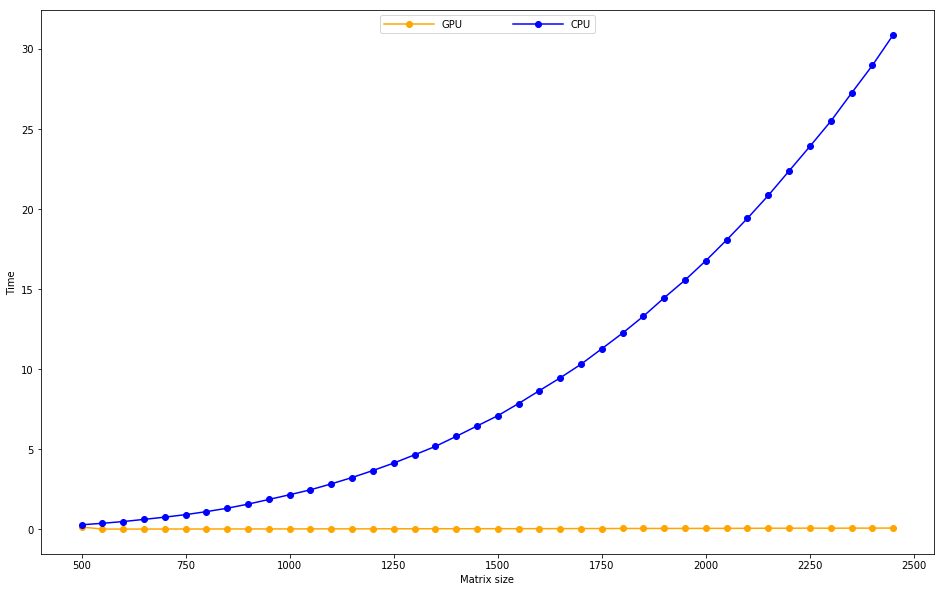

In [3]:
plt.figure(figsize=(16,10))
plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-', color='orange', label='GPU')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-', color='blue', label='CPU')

plt.legend(loc='upper center', ncol=2, handlelength=5, columnspacing=5.0)

plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [4]:
print("\nGPU times {}".format(gpu_times))
print("\nCPU times {}".format(cpu_times))
print("\nMean time difference {}".format((sum(cpu_times) - sum(gpu_times))/len(gpu_times)))


GPU times [0.1381828784942627, 0.00707697868347168, 0.00859379768371582, 0.009636640548706055, 0.011176824569702148, 0.012477874755859375, 0.012955904006958008, 0.014950752258300781, 0.015004634857177734, 0.01745009422302246, 0.01889777183532715, 0.02020740509033203, 0.02174520492553711, 0.021143436431884766, 0.023890018463134766, 0.026430368423461914, 0.027785539627075195, 0.029058456420898438, 0.030231952667236328, 0.031157493591308594, 0.03209948539733887, 0.03401017189025879, 0.034607648849487305, 0.03621268272399902, 0.041869163513183594, 0.04149651527404785, 0.04428219795227051, 0.04696345329284668, 0.046897172927856445, 0.048186540603637695, 0.05138230323791504, 0.05283355712890625, 0.055877685546875, 0.061856746673583984, 0.061522722244262695, 0.0673832893371582, 0.061385393142700195, 0.06678342819213867, 0.06782007217407227, 0.07117414474487305]

CPU times [0.275043249130249, 0.3685758113861084, 0.4777677059173584, 0.6126570701599121, 0.7534782886505127, 0.909214973449707, 1.